In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

In [5]:
transactions.info()
products.info()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pan

In [17]:
duplicates = {
    "Transactions": transactions.duplicated().sum(),
    "Products": products.duplicated().sum(),
    "Customers": customers.duplicated().sum(),
}
duplicates

{'Transactions': 0, 'Products': 0, 'Customers': 0}

In [18]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


Most common product categories in the Products dataset

In [25]:
category_count = products['Category'].value_counts()
category_count

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

Transactions by region

In [24]:
region_sales = transactions.merge(customers, on="CustomerID").groupby("Region")["TotalValue"].sum()
region_sales

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

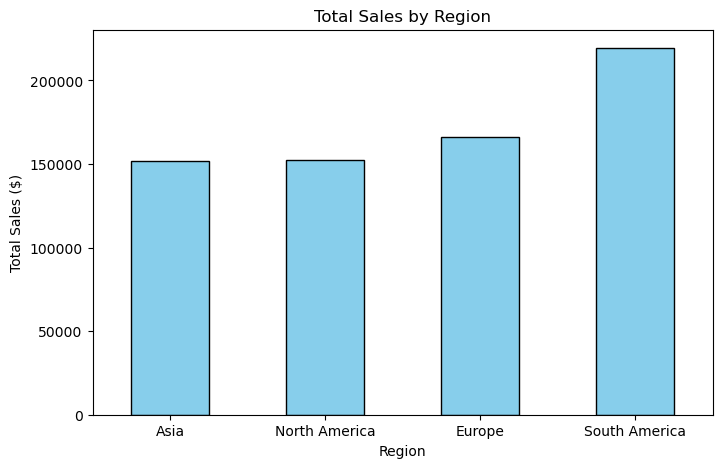

In [ ]:
plt.figure(figsize=(8, 5))
region_sales.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.show()

Total Value Distribution Across Categories

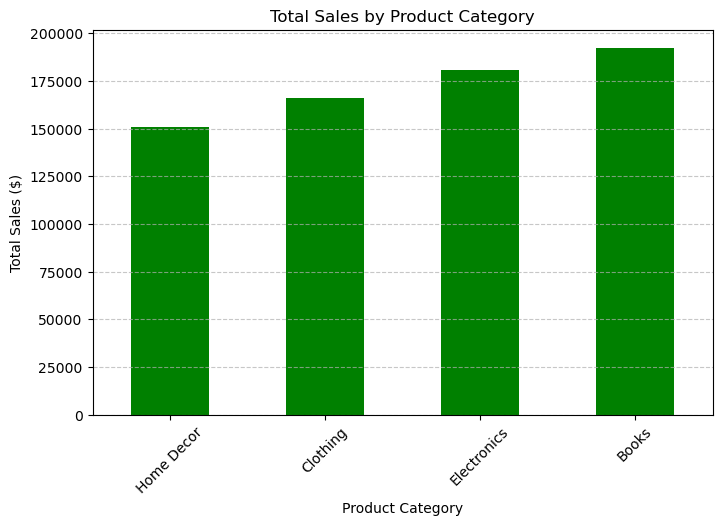

In [31]:
transactions_with_category = transactions.merge(products, on="ProductID")
category_sales = transactions_with_category.groupby("Category")["TotalValue"].sum()

plt.figure(figsize=(8, 5))
category_sales.sort_values().plot(kind='bar', color='green')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Distributions of TotalValue and Quantity in Transactions

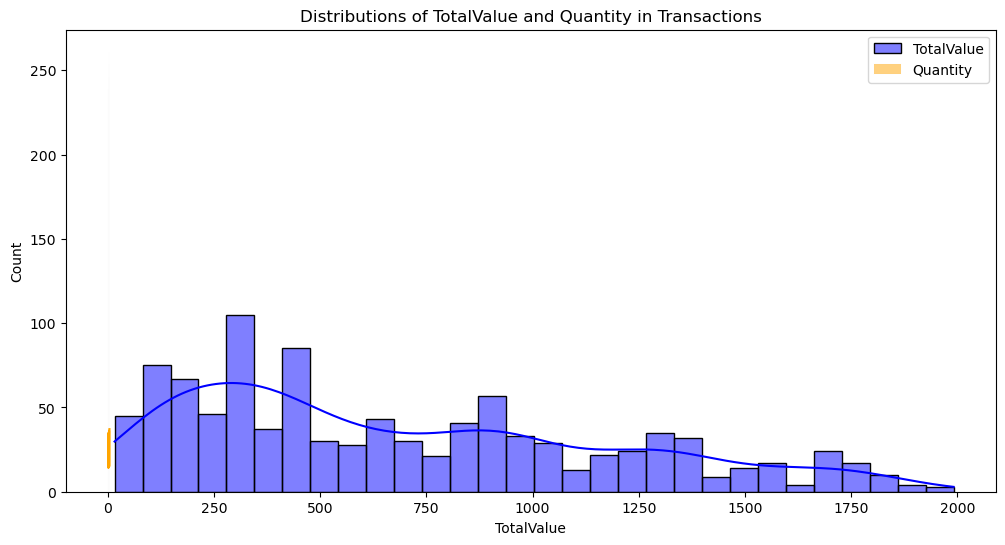

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(transactions['TotalValue'], kde=True, bins=30, color='blue', label='TotalValue')
sns.histplot(transactions['Quantity'], kde=True, bins=30, color='orange', label='Quantity')
plt.legend()
plt.title("Distributions of TotalValue and Quantity in Transactions")
plt.show()

Product Category Distribution

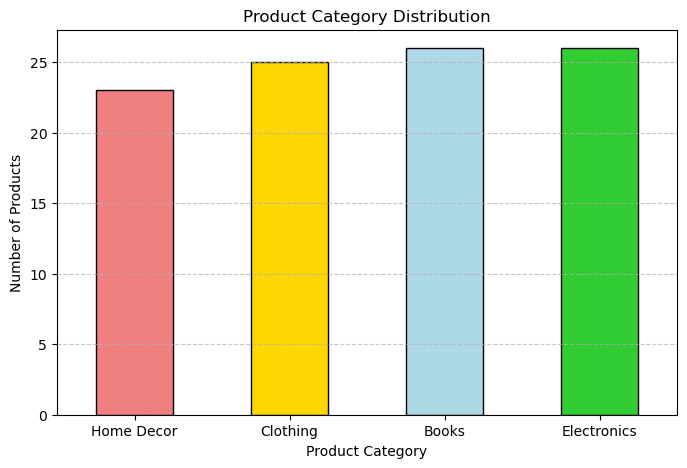

In [41]:
plt.figure(figsize=(8, 5))
category_count.sort_values().plot(kind='bar', color=['lightcoral', 'gold', 'lightblue', 'limegreen'], edgecolor='black')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
